In [1]:
import numpy as py

In [2]:
#importing data for analysis
import pandas as pd
nhanes_data = pd.read_csv('https://raw.githubusercontent.com/GTPB/PSLS20/master/data/NHANES.csv')
print(nhanes_data)

         ID SurveyYr  Gender  Age AgeDecade  AgeMonths    Race1    Race3  \
0     51624  2009_10    male   34     30-39      409.0    White      NaN   
1     51624  2009_10    male   34     30-39      409.0    White      NaN   
2     51624  2009_10    male   34     30-39      409.0    White      NaN   
3     51625  2009_10    male    4       0-9       49.0    Other      NaN   
4     51630  2009_10  female   49     40-49      596.0    White      NaN   
...     ...      ...     ...  ...       ...        ...      ...      ...   
9995  71909  2011_12    male   28     20-29        NaN  Mexican  Mexican   
9996  71910  2011_12  female    0       0-9        5.0    White    White   
9997  71911  2011_12    male   27     20-29        NaN  Mexican  Mexican   
9998  71915  2011_12    male   60     60-69        NaN    White    White   
9999  71915  2011_12    male   60     60-69        NaN    White    White   

           Education MaritalStatus  ... RegularMarij  AgeRegMarij  HardDrugs  \
0      

In [3]:
#find out the column names and size of dataset
nhanes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                10000 non-null  int64  
 1   SurveyYr          10000 non-null  object 
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   AgeDecade         9667 non-null   object 
 5   AgeMonths         4962 non-null   float64
 6   Race1             10000 non-null  object 
 7   Race3             5000 non-null   object 
 8   Education         7221 non-null   object 
 9   MaritalStatus     7231 non-null   object 
 10  HHIncome          9189 non-null   object 
 11  HHIncomeMid       9189 non-null   float64
 12  Poverty           9274 non-null   float64
 13  HomeRooms         9931 non-null   float64
 14  HomeOwn           9937 non-null   object 
 15  Work              7771 non-null   object 
 16  Weight            9922 non-null   float64

In [4]:
#dropping duplicate rows
nhanes_data1 = nhanes_data.drop_duplicates()

In [5]:
#after duplicates dropped, 10,000 rows reduce to now 7,832
nhanes_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7832 non-null   int64  
 1   SurveyYr          7832 non-null   object 
 2   Gender            7832 non-null   object 
 3   Age               7832 non-null   int64  
 4   AgeDecade         7549 non-null   object 
 5   AgeMonths         3561 non-null   float64
 6   Race1             7832 non-null   object 
 7   Race3             4264 non-null   object 
 8   Education         5469 non-null   object 
 9   MaritalStatus     5474 non-null   object 
 10  HHIncome          7179 non-null   object 
 11  HHIncomeMid       7179 non-null   float64
 12  Poverty           7254 non-null   float64
 13  HomeRooms         7778 non-null   float64
 14  HomeOwn           7782 non-null   object 
 15  Work              5910 non-null   object 
 16  Weight            7771 non-null   float64


In [6]:
#number of unique ids with data
count_unique_ids = nhanes_data1['ID'].nunique()
print(count_unique_ids)

6779


In [7]:
#Count unique values in each column 
nhanes_data1.agg(['nunique'])
pd.set_option('display.max_columns', None)
print(nhanes_data1.agg(['nunique']))


           ID  SurveyYr  Gender  Age  AgeDecade  AgeMonths  Race1  Race3  \
nunique  6779         2       2   81          8        910      5      6   

         Education  MaritalStatus  HHIncome  HHIncomeMid  Poverty  HomeRooms  \
nunique          5              6        12           12      450         13   

         HomeOwn  Work  Weight  Length  HeadCirc  Height   BMI  \
nunique        3     3    1290     309        56     980  2073   

         BMICatUnder20yrs  BMI_WHO  Pulse  BPSysAve  BPDiaAve  BPSys1  BPDia1  \
nunique                 4        4     47       126       102      70      51   

         BPSys2  BPDia2  BPSys3  BPDia3  Testosterone  DirectChol  TotChol  \
nunique      69      51      66      50          2311         106      250   

         UrineVol1  UrineFlow1  UrineVol2  UrineFlow2  Diabetes  DiabetesAge  \
nunique        424        2066        294         760         2           72   

         HealthGen  DaysPhysHlthBad  DaysMentHlthBad  LittleInterest  \


In [8]:
#6779 rows with unique id's, 7832 rows in total. For unique id's check how many entries per column. Sorting by highest amount
grouped = nhanes_data1.groupby('ID').count().reset_index()
grouped.sort_values('SurveyYr', ascending = False)

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Length,HeadCirc,Height,BMI,BMICatUnder20yrs,BMI_WHO,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,Diabetes,DiabetesAge,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,LittleInterest,Depressed,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,SleepTrouble,PhysActive,PhysActiveDays,TVHrsDay,CompHrsDay,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Marijuana,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
3958,63297,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,0,0,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,5,0,5,5,5,5,5,0,0,0,5,5,5,4,5,5,0,0,5,0,5,0,5,5,0,5,5,5,0,5,5,5,5,5,5,5,0
5202,67118,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,0,0,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,5,0,5,5,5,5,5,5,5,5,5,5,5,4,5,5,0,0,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,0,5
3909,63149,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,0,0,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,4,5,5,0,0,5,5,5,0,5,5,0,5,0,5,0,5,5,5,5,5,5,5,5
3785,62804,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,0,0,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,4,0,4,4,4,4,4,0,0,0,4,4,4,3,4,4,0,0,4,4,4,0,4,4,0,0,0,0,0,4,4,4,4,0,4,0,0
4262,64228,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,0,0,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,4,4,4,4,4,4,4,0,0,0,4,4,4,4,4,4,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,58283,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,0
2255,58276,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2254,58275,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2253,58274,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0


In [9]:
#view sample id's with more than one entry and compare
nhanes_data1[nhanes_data1['ID'] == 63297]


,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Length,HeadCirc,Height,BMI,BMICatUnder20yrs,BMI_WHO,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,Diabetes,DiabetesAge,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,LittleInterest,Depressed,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,SleepTrouble,PhysActive,PhysActiveDays,TVHrsDay,CompHrsDay,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Marijuana,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
5608,63297,2011_12,male,50,50-59,NaN,White,White,College Grad,Married,75000-99999,87500.0,5.0,7.0,Own,Working,94.2,NaN,NaN,175.5,30.6,NaN,30.0_plus,78.0,110.0,79.0,112.0,84.0,108.0,80.0,112.0,78.0,246.82,0.85,3.18,56.0,0.339,NaN,NaN,No,NaN,Good,2.0,0.0,None,None,NaN,NaN,NaN,9.0,No,Yes,NaN,3_hr,0_to_1_hr,NaN,NaN,Yes,NaN,0.0,NaN,No,Non-Smoker,NaN,Yes,14.0,No,NaN,No,Yes,17.0,30.0,1.0,No,Heterosexual,NaN
5609,63297,2011_12,male,50,50-59,NaN,White,White,College Grad,Married,75000-99999,87500.0,5.0,7.0,Own,Working,94.2,NaN,NaN,175.5,30.6,NaN,30.0_plus,78.0,110.0,79.0,112.0,84.0,108.0,80.0,112.0,78.0,246.82,0.85,3.18,56.0,0.339,NaN,NaN,No,NaN,Good,2.0,0.0,None,None,NaN,NaN,NaN,9.0,No,Yes,6.0,3_hr,0_to_1_hr,NaN,NaN,Yes,NaN,0.0,NaN,No,Non-Smoker,NaN,Yes,14.0,No,NaN,No,Yes,17.0,30.0,1.0,No,Heterosexual,NaN
5611,63297,2011_12,male,50,50-59,NaN,White,White,College Grad,Married,75000-99999,87500.0,5.0,7.0,Own,Working,94.2,NaN,NaN,175.5,30.6,NaN,30.0_plus,78.0,110.0,79.0,112.0,84.0,108.0,80.0,112.0,78.0,246.82,0.85,3.18,56.0,0.339,NaN,NaN,No,NaN,Good,2.0,0.0,None,None,NaN,NaN,NaN,9.0,No,Yes,3.0,3_hr,0_to_1_hr,NaN,NaN,Yes,NaN,0.0,NaN,No,Non-Smoker,NaN,Yes,14.0,No,NaN,No,Yes,17.0,30.0,1.0,No,Heterosexual,NaN
5612,63297,2011_12,male,50,50-59,NaN,White,White,College Grad,Married,75000-99999,87500.0,5.0,7.0,Own,Working,94.2,NaN,NaN,175.5,30.6,NaN,30.0_plus,78.0,110.0,79.0,112.0,84.0,108.0,80.0,112.0,78.0,246.82,0.85,3.18,56.0,0.339,NaN,NaN,No,NaN,Good,2.0,0.0,None,None,NaN,NaN,NaN,9.0,No,Yes,2.0,3_hr,0_to_1_hr,NaN,NaN,Yes,NaN,0.0,NaN,No,Non-Smoker,NaN,Yes,14.0,No,NaN,No,Yes,17.0,30.0,1.0,No,Heterosexual,NaN
5613,63297,2011_12,male,50,50-59,NaN,White,White,College Grad,Married,75000-99999,87500.0,5.0,7.0,Own,Working,94.2,NaN,NaN,175.5,30.6,NaN,30.0_plus,78.0,110.0,79.0,112.0,84.0,108.0,80.0,112.0,78.0,246.82,0.85,3.18,56.0,0.339,NaN,NaN,No,NaN,Good,2.0,0.0,None,None,NaN,NaN,NaN,9.0,No,Yes,4.0,3_hr,0_to_1_hr,NaN,NaN,Yes,NaN,0.0,NaN,No,Non-Smoker,NaN,Yes,14.0,No,NaN,No,Yes,17.0,30.0,1.0,No,Heterosexual,NaN


In [10]:
nhanes_data1[nhanes_data1['ID'] == 67118]

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Length,HeadCirc,Height,BMI,BMICatUnder20yrs,BMI_WHO,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,Diabetes,DiabetesAge,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,LittleInterest,Depressed,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,SleepTrouble,PhysActive,PhysActiveDays,TVHrsDay,CompHrsDay,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Marijuana,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
7541,67118,2011_12,female,33,30-39,NaN,White,White,Some College,Divorced,25000-34999,30000.0,1.34,5.0,Rent,Working,81.5,NaN,NaN,161.8,31.1,NaN,30.0_plus,76.0,113.0,61.0,114.0,68.0,114.0,58.0,112.0,64.0,31.96,1.19,4.37,123.0,0.728,NaN,NaN,No,NaN,Good,3.0,5.0,Several,None,5.0,3.0,25.0,5.0,No,No,5.0,1_hr,2_hr,NaN,NaN,Yes,2.0,52.0,No,Yes,Smoker,14.0,Yes,16.0,No,NaN,No,Yes,14.0,6.0,0.0,No,NaN,No
7542,67118,2011_12,female,33,30-39,NaN,White,White,Some College,Divorced,25000-34999,30000.0,1.34,5.0,Rent,Working,81.5,NaN,NaN,161.8,31.1,NaN,30.0_plus,76.0,113.0,61.0,114.0,68.0,114.0,58.0,112.0,64.0,31.96,1.19,4.37,123.0,0.728,NaN,NaN,No,NaN,Good,3.0,5.0,Several,None,5.0,3.0,25.0,5.0,No,No,3.0,1_hr,2_hr,NaN,NaN,Yes,2.0,52.0,No,Yes,Smoker,14.0,Yes,16.0,No,NaN,No,Yes,14.0,6.0,0.0,No,NaN,No
7543,67118,2011_12,female,33,30-39,NaN,White,White,Some College,Divorced,25000-34999,30000.0,1.34,5.0,Rent,Working,81.5,NaN,NaN,161.8,31.1,NaN,30.0_plus,76.0,113.0,61.0,114.0,68.0,114.0,58.0,112.0,64.0,31.96,1.19,4.37,123.0,0.728,NaN,NaN,No,NaN,Good,3.0,5.0,Several,None,5.0,3.0,25.0,5.0,No,No,4.0,1_hr,2_hr,NaN,NaN,Yes,2.0,52.0,No,Yes,Smoker,14.0,Yes,16.0,No,NaN,No,Yes,14.0,6.0,0.0,No,NaN,No
7544,67118,2011_12,female,33,30-39,NaN,White,White,Some College,Divorced,25000-34999,30000.0,1.34,5.0,Rent,Working,81.5,NaN,NaN,161.8,31.1,NaN,30.0_plus,76.0,113.0,61.0,114.0,68.0,114.0,58.0,112.0,64.0,31.96,1.19,4.37,123.0,0.728,NaN,NaN,No,NaN,Good,3.0,5.0,Several,None,5.0,3.0,25.0,5.0,No,No,NaN,1_hr,2_hr,NaN,NaN,Yes,2.0,52.0,No,Yes,Smoker,14.0,Yes,16.0,No,NaN,No,Yes,14.0,6.0,0.0,No,NaN,No
7545,67118,2011_12,female,33,30-39,NaN,White,White,Some College,Divorced,25000-34999,30000.0,1.34,5.0,Rent,Working,81.5,NaN,NaN,161.8,31.1,NaN,30.0_plus,76.0,113.0,61.0,114.0,68.0,114.0,58.0,112.0,64.0,31.96,1.19,4.37,123.0,0.728,NaN,NaN,No,NaN,Good,3.0,5.0,Several,None,5.0,3.0,25.0,5.0,No,No,1.0,1_hr,2_hr,NaN,NaN,Yes,2.0,52.0,No,Yes,Smoker,14.0,Yes,16.0,No,NaN,No,Yes,14.0,6.0,0.0,No,NaN,No


In [11]:
#For both sampled id's, all row entries match with the exception of'PhysActiveDays' as this seems to be bad data. Remove this column and reassess number of rows after again dropping dulicates
del nhanes_data1['PhysActiveDays']

In [12]:
#now drop duplicates again
nhanes_data2 = nhanes_data1.drop_duplicates()

In [13]:
#There are now 6779 rows matching 6779 unique id's
print(nhanes_data2)

         ID SurveyYr  Gender  Age AgeDecade  AgeMonths    Race1    Race3  \
0     51624  2009_10    male   34     30-39      409.0    White      NaN   
3     51625  2009_10    male    4       0-9       49.0    Other      NaN   
4     51630  2009_10  female   49     40-49      596.0    White      NaN   
5     51638  2009_10    male    9       0-9      115.0    White      NaN   
6     51646  2009_10    male    8       0-9      101.0    White      NaN   
...     ...      ...     ...  ...       ...        ...      ...      ...   
9991  71908  2011_12  female   66     60-69        NaN    White    White   
9993  71909  2011_12    male   28     20-29        NaN  Mexican  Mexican   
9996  71910  2011_12  female    0       0-9        5.0    White    White   
9997  71911  2011_12    male   27     20-29        NaN  Mexican  Mexican   
9998  71915  2011_12    male   60     60-69        NaN    White    White   

           Education MaritalStatus     HHIncome  HHIncomeMid  Poverty  \
0        High 

In [14]:
#checking for null values
nhanes_data2.isnull().sum()

ID                    0
SurveyYr              0
Gender                0
Age                   0
AgeDecade           249
                   ... 
SexNumPartnLife    3192
SexNumPartYear     3705
SameSex            3164
SexOrientation     3770
PregnantNow        5660
Length: 75, dtype: int64

In [15]:
#Set index to ID
nhanes_data3 = pd.DataFrame(nhanes_data2.set_index('ID'))
print(nhanes_data3)

      SurveyYr  Gender  Age AgeDecade  AgeMonths    Race1    Race3  \
ID                                                                   
51624  2009_10    male   34     30-39      409.0    White      NaN   
51625  2009_10    male    4       0-9       49.0    Other      NaN   
51630  2009_10  female   49     40-49      596.0    White      NaN   
51638  2009_10    male    9       0-9      115.0    White      NaN   
51646  2009_10    male    8       0-9      101.0    White      NaN   
...        ...     ...  ...       ...        ...      ...      ...   
71908  2011_12  female   66     60-69        NaN    White    White   
71909  2011_12    male   28     20-29        NaN  Mexican  Mexican   
71910  2011_12  female    0       0-9        5.0    White    White   
71911  2011_12    male   27     20-29        NaN  Mexican  Mexican   
71915  2011_12    male   60     60-69        NaN    White    White   

            Education MaritalStatus     HHIncome  HHIncomeMid  Poverty  \
ID             

In [16]:
#Replace null values with 0
nhanes_data3 = nhanes_data3.fillna(0)
print(nhanes_data3)

      SurveyYr  Gender  Age AgeDecade  AgeMonths    Race1    Race3  \
ID                                                                   
51624  2009_10    male   34     30-39      409.0    White        0   
51625  2009_10    male    4       0-9       49.0    Other        0   
51630  2009_10  female   49     40-49      596.0    White        0   
51638  2009_10    male    9       0-9      115.0    White        0   
51646  2009_10    male    8       0-9      101.0    White        0   
...        ...     ...  ...       ...        ...      ...      ...   
71908  2011_12  female   66     60-69        0.0    White    White   
71909  2011_12    male   28     20-29        0.0  Mexican  Mexican   
71910  2011_12  female    0       0-9        5.0    White    White   
71911  2011_12    male   27     20-29        0.0  Mexican  Mexican   
71915  2011_12    male   60     60-69        0.0    White    White   

            Education MaritalStatus     HHIncome  HHIncomeMid  Poverty  \
ID             

In [17]:
#There are 6 different Marital Status, what are these?
mstat_unique_values = (nhanes_data3['MaritalStatus']).unique()
print(mstat_unique_values)

['Married' 0 'LivePartner' 'Divorced' 'NeverMarried' 'Separated' 'Widowed']


In [18]:
#Depressed unique answers
depressed_unique_values = (nhanes_data3['Depressed']).unique()
print(depressed_unique_values)

['Several' 0 'None' 'Most']


In [19]:
#What answers are completed for Education
education_unique_values = (nhanes_data3['Education']).unique()
print(education_unique_values)

['High School' 0 'Some College' 'College Grad' '9 - 11th Grade'
 '8th Grade']


In [20]:
#Categories for Work status
work_unique_values = (nhanes_data3['Work']).unique()
print(work_unique_values)

['NotWorking' 0 'Working' 'Looking']


In [21]:
#boolean check for people 21 and over
nhanes_data3['Age']>=21


ID
51624     True
51625    False
51630     True
51638    False
51646    False
         ...  
71908     True
71909     True
71910    False
71911     True
71915     True
Name: Age, Length: 6779, dtype: bool

In [22]:
#create subset of adults 21 and over
adult_nhanes = nhanes_data3[nhanes_data3['Age']>=21]
print(adult_nhanes)

      SurveyYr  Gender  Age AgeDecade  AgeMonths    Race1    Race3  \
ID                                                                   
51624  2009_10    male   34     30-39      409.0    White        0   
51630  2009_10  female   49     40-49      596.0    White        0   
51647  2009_10  female   45     40-49      541.0    White        0   
51654  2009_10    male   66     60-69      795.0    White        0   
51656  2009_10    male   58     50-59      707.0    White        0   
...        ...     ...  ...       ...        ...      ...      ...   
71907  2011_12    male   80         0        0.0    White    White   
71908  2011_12  female   66     60-69        0.0    White    White   
71909  2011_12    male   28     20-29        0.0  Mexican  Mexican   
71911  2011_12    male   27     20-29        0.0  Mexican  Mexican   
71915  2011_12    male   60     60-69        0.0    White    White   

            Education MaritalStatus     HHIncome  HHIncomeMid  Poverty  \
ID             

In [23]:
#4470 adults in subset
adult_nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 51624 to 71915
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SurveyYr          4562 non-null   object 
 1   Gender            4562 non-null   object 
 2   Age               4562 non-null   int64  
 3   AgeDecade         4562 non-null   object 
 4   AgeMonths         4562 non-null   float64
 5   Race1             4562 non-null   object 
 6   Race3             4562 non-null   object 
 7   Education         4562 non-null   object 
 8   MaritalStatus     4562 non-null   object 
 9   HHIncome          4562 non-null   object 
 10  HHIncomeMid       4562 non-null   float64
 11  Poverty           4562 non-null   float64
 12  HomeRooms         4562 non-null   float64
 13  HomeOwn           4562 non-null   object 
 14  Work              4562 non-null   object 
 15  Weight            4562 non-null   float64
 16  Length            4562 non-null   flo

In [24]:
#sort original DataFrame by age
sorted_by_age = nhanes_data3.sort_values(by=['Age'], ascending = False)
print(sorted_by_age)

      SurveyYr  Gender  Age AgeDecade  AgeMonths     Race1     Race3  \
ID                                                                     
68115  2011_12  female   80         0        0.0     White     White   
53576  2009_10  female   80         0        0.0     White         0   
62727  2011_12  female   80         0        0.0     White     White   
65051  2011_12  female   80         0        0.0  Hispanic  Hispanic   
60371  2009_10  female   80         0        0.0     White         0   
...        ...     ...  ...       ...        ...       ...       ...   
71463  2011_12    male    0       0-9        4.0   Mexican   Mexican   
56995  2009_10    male    0       0-9        0.0   Mexican         0   
59212  2009_10  female    0       0-9        2.0     White         0   
55334  2009_10  female    0       0-9       11.0     White         0   
61553  2009_10    male    0       0-9       11.0     White         0   

          Education MaritalStatus     HHIncome  HHIncomeMid  Po

In [25]:
#Change Age from the main DataFrame to a list and check number of rows for >=21 matches
zip(sorted_by_age.Age)


In [26]:
type(zip(sorted_by_age.Age))

zip

In [27]:
age_list = list(zip(sorted_by_age.Age))
print(age_list)

[(80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,), (80,)

In [28]:
#how does this look as a numpy array
import numpy as np
age_array = np.array(age_list)
print(age_array)

[[80]
 [80]
 [80]
 ...
 [ 0]
 [ 0]
 [ 0]]


In [29]:
#check last element of descending ages
print(age_array[-1])

[0]


In [30]:
#check first element of descending ages
print(age_array[0])

[80]


In [31]:
#Use a for loop to check number of entries 21 and over. Result 4562, this matches number of rows in adults subset
count = 0
for age in age_array:
    if age < 21:
        break
    else:
        count = count + 1
        
print(count)

4562


In [32]:
#create a subset with the columns to focus on 
nhanes_analysis1 = adult_nhanes[["SurveyYr", "Age", "Gender", "Education", "MaritalStatus", "HomeOwn", "Work", "HHIncomeMid", "Weight", "Height", "BMI", "DaysMentHlthBad", "Depressed", "TVHrsDay"]]
print(nhanes_analysis1)

      SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
ID                                                                              
51624  2009_10   34    male     High School       Married     Own  NotWorking   
51630  2009_10   49  female    Some College   LivePartner    Rent  NotWorking   
51647  2009_10   45  female    College Grad       Married     Own     Working   
51654  2009_10   66    male    Some College       Married     Own  NotWorking   
51656  2009_10   58    male    College Grad      Divorced    Rent     Working   
...        ...  ...     ...             ...           ...     ...         ...   
71907  2011_12   80    male     High School       Married     Own  NotWorking   
71908  2011_12   66  female    College Grad       Widowed     Own     Working   
71909  2011_12   28    male  9 - 11th Grade  NeverMarried    Rent     Working   
71911  2011_12   27    male    College Grad       Married     Own     Working   
71915  2011_12   60    male 

In [33]:
print(nhanes_analysis1['SurveyYr'].dtype)

object


In [34]:
print(nhanes_analysis1)

      SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
ID                                                                              
51624  2009_10   34    male     High School       Married     Own  NotWorking   
51630  2009_10   49  female    Some College   LivePartner    Rent  NotWorking   
51647  2009_10   45  female    College Grad       Married     Own     Working   
51654  2009_10   66    male    Some College       Married     Own  NotWorking   
51656  2009_10   58    male    College Grad      Divorced    Rent     Working   
...        ...  ...     ...             ...           ...     ...         ...   
71907  2011_12   80    male     High School       Married     Own  NotWorking   
71908  2011_12   66  female    College Grad       Widowed     Own     Working   
71909  2011_12   28    male  9 - 11th Grade  NeverMarried    Rent     Working   
71911  2011_12   27    male    College Grad       Married     Own     Working   
71915  2011_12   60    male 

In [35]:
#removing python warning with regard to sliced DataFrame
nhanes_analysis1.is_copy = False

In [36]:
#removing python warning with regard to sliced DataFrame
pd.set_option('mode.chained_assignment', None)

In [37]:
#to find year of birth we need the year of the survey, new column added
nhanes_analysis1['YearSurvey'] = nhanes_analysis1['SurveyYr'].str[:4]
print(nhanes_analysis1)

      SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
ID                                                                              
51624  2009_10   34    male     High School       Married     Own  NotWorking   
51630  2009_10   49  female    Some College   LivePartner    Rent  NotWorking   
51647  2009_10   45  female    College Grad       Married     Own     Working   
51654  2009_10   66    male    Some College       Married     Own  NotWorking   
51656  2009_10   58    male    College Grad      Divorced    Rent     Working   
...        ...  ...     ...             ...           ...     ...         ...   
71907  2011_12   80    male     High School       Married     Own  NotWorking   
71908  2011_12   66  female    College Grad       Widowed     Own     Working   
71909  2011_12   28    male  9 - 11th Grade  NeverMarried    Rent     Working   
71911  2011_12   27    male    College Grad       Married     Own     Working   
71915  2011_12   60    male 

In [38]:
nhanes_analysis1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 51624 to 71915
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SurveyYr         4562 non-null   object 
 1   Age              4562 non-null   int64  
 2   Gender           4562 non-null   object 
 3   Education        4562 non-null   object 
 4   MaritalStatus    4562 non-null   object 
 5   HomeOwn          4562 non-null   object 
 6   Work             4562 non-null   object 
 7   HHIncomeMid      4562 non-null   float64
 8   Weight           4562 non-null   float64
 9   Height           4562 non-null   float64
 10  BMI              4562 non-null   float64
 11  DaysMentHlthBad  4562 non-null   float64
 12  Depressed        4562 non-null   object 
 13  TVHrsDay         4562 non-null   object 
 14  YearSurvey       4562 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 570.2+ KB


In [39]:
#YearSurvey must be converted to int in order to calculate Year of Birth
nhanes_analysis1['YearSurvey'] = nhanes_analysis1['YearSurvey'].astype(int)

In [40]:
nhanes_analysis1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 51624 to 71915
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SurveyYr         4562 non-null   object 
 1   Age              4562 non-null   int64  
 2   Gender           4562 non-null   object 
 3   Education        4562 non-null   object 
 4   MaritalStatus    4562 non-null   object 
 5   HomeOwn          4562 non-null   object 
 6   Work             4562 non-null   object 
 7   HHIncomeMid      4562 non-null   float64
 8   Weight           4562 non-null   float64
 9   Height           4562 non-null   float64
 10  BMI              4562 non-null   float64
 11  DaysMentHlthBad  4562 non-null   float64
 12  Depressed        4562 non-null   object 
 13  TVHrsDay         4562 non-null   object 
 14  YearSurvey       4562 non-null   int32  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 552.4+ KB


In [41]:
#Year of birth calculation, new column added
nhanes_analysis1['YearOfBirth'] = nhanes_analysis1['YearSurvey'] - nhanes_analysis1['Age']
print(nhanes_analysis1)

      SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
ID                                                                              
51624  2009_10   34    male     High School       Married     Own  NotWorking   
51630  2009_10   49  female    Some College   LivePartner    Rent  NotWorking   
51647  2009_10   45  female    College Grad       Married     Own     Working   
51654  2009_10   66    male    Some College       Married     Own  NotWorking   
51656  2009_10   58    male    College Grad      Divorced    Rent     Working   
...        ...  ...     ...             ...           ...     ...         ...   
71907  2011_12   80    male     High School       Married     Own  NotWorking   
71908  2011_12   66  female    College Grad       Widowed     Own     Working   
71909  2011_12   28    male  9 - 11th Grade  NeverMarried    Rent     Working   
71911  2011_12   27    male    College Grad       Married     Own     Working   
71915  2011_12   60    male 

In [42]:
#average age of surveyed people
age_array.mean()

35.45095146776811

In [43]:
age_array.max()

80

In [44]:
age_array.min()

0

In [45]:
#change weight type to float
nhanes_analysis1['Weight'] = nhanes_analysis1['Weight'].astype(float)

In [46]:
#define function weight_pounds to calculate weight in pounds
def weight_pounds(x):
    return(x*2.205)

In [47]:
#Call function to convert create a new column of weight in pounds
nhanes_analysis1['WeightPounds'] = nhanes_analysis1['Weight'].apply(weight_pounds)

192.717
191.17350000000002
166.91850000000002
149.94
172.872
164.7135
126.78750000000001
185.4405
206.829
164.493
126.78750000000001
112.455
251.14950000000002
258.6465
174.63600000000002
190.73250000000002
138.474
143.10450000000003
119.7315
193.158
181.0305
172.431
111.79350000000001
296.1315
132.9615
190.2915
228.2175
186.543
160.3035
113.778
233.73000000000002
154.1295
143.10450000000003
193.599
149.499
277.389
149.7195
194.92200000000003
118.8495
207.4905
147.51450000000003
187.866
147.07350000000002
207.27
113.337
129.654
210.57750000000001
151.92450000000002
168.903
173.9745
215.86950000000002
300.54150000000004
200.8755
132.3
136.269
127.449
182.574
187.866
203.5215
165.816
193.599
192.276
189.63
285.10650000000004
119.07000000000001
158.76
240.1245
180.369
196.686
211.45950000000002
190.953
112.2345
210.1365
221.1615
168.903
172.2105
153.468
136.71
162.72899999999998
190.07100000000003
165.816
170.00549999999998
190.51200000000003
154.1295
216.3105
213.003
158.319
226.01250000

In [48]:
#weight_pounds did not display correctly in DataFrame, requires further investigation if time allows
print(nhanes_analysis1)

      SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
ID                                                                              
51624  2009_10   34    male     High School       Married     Own  NotWorking   
51630  2009_10   49  female    Some College   LivePartner    Rent  NotWorking   
51647  2009_10   45  female    College Grad       Married     Own     Working   
51654  2009_10   66    male    Some College       Married     Own  NotWorking   
51656  2009_10   58    male    College Grad      Divorced    Rent     Working   
...        ...  ...     ...             ...           ...     ...         ...   
71907  2011_12   80    male     High School       Married     Own  NotWorking   
71908  2011_12   66  female    College Grad       Widowed     Own     Working   
71909  2011_12   28    male  9 - 11th Grade  NeverMarried    Rent     Working   
71911  2011_12   27    male    College Grad       Married     Own     Working   
71915  2011_12   60    male 

In [49]:
nhanes_analysis1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 51624 to 71915
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SurveyYr         4562 non-null   object 
 1   Age              4562 non-null   int64  
 2   Gender           4562 non-null   object 
 3   Education        4562 non-null   object 
 4   MaritalStatus    4562 non-null   object 
 5   HomeOwn          4562 non-null   object 
 6   Work             4562 non-null   object 
 7   HHIncomeMid      4562 non-null   float64
 8   Weight           4562 non-null   float64
 9   Height           4562 non-null   float64
 10  BMI              4562 non-null   float64
 11  DaysMentHlthBad  4562 non-null   float64
 12  Depressed        4562 non-null   object 
 13  TVHrsDay         4562 non-null   object 
 14  YearSurvey       4562 non-null   int32  
 15  YearOfBirth      4562 non-null   int64  
 16  WeightPounds     0 non-null      object 
dtypes: float6

In [50]:
#import excel file of generation categories
generation = pd.read_excel(r"C:\Users\annma\PycharmProjects\test\Generations.xlsx")
print(generation)

   Generation  Born Year
0       Gen_Z       1997
1       Gen_Z       1998
2       Gen_Z       1999
3       Gen_Z       2000
4       Gen_Z       2001
..        ...        ...
86        WW2       1923
87        WW2       1924
88        WW2       1925
89        WW2       1926
90        WW2       1927

[91 rows x 2 columns]


In [51]:
#merge generations with analysis dataframe 
nhanes_analysis2 = nhanes_analysis1.merge(generation, left_on='YearOfBirth', right_on='Born Year')

In [52]:
print(nhanes_analysis2)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
1     2009_10   34  female    College Grad       Married     Own     Working   
2     2009_10   34  female    College Grad       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
4     2009_10   34    male    College Grad       Married     Own     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4557  2011_12   22  female    Some College  NeverMarried     Own     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   
4559  2011_12   22  female    College Grad  NeverMarried     Own     Working   
4560  2011_12   22    male    Some College  NeverMarried    Rent     Working   
4561  2011_12   22    male  9 - 11th Grade  NeverMarried    Rent     Working   

      HHIncomeMid  Weight  Height    BM

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
nhanes_analysis2['BMI'] = nhanes_analysis2['BMI'].astype(int)

In [55]:
#do not include nulls in the graphs
na3 = nhanes_analysis2[nhanes_analysis2['BMI']>0]
print(na3)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
1     2009_10   34  female    College Grad       Married     Own     Working   
2     2009_10   34  female    College Grad       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
4     2009_10   34    male    College Grad       Married     Own     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4557  2011_12   22  female    Some College  NeverMarried     Own     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   
4559  2011_12   22  female    College Grad  NeverMarried     Own     Working   
4560  2011_12   22    male    Some College  NeverMarried    Rent     Working   
4561  2011_12   22    male  9 - 11th Grade  NeverMarried    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

In [56]:
na4 = na3[na3['HHIncomeMid']>0]
print(na4)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
1     2009_10   34  female    College Grad       Married     Own     Working   
2     2009_10   34  female    College Grad       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
4     2009_10   34    male    College Grad       Married     Own     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4557  2011_12   22  female    Some College  NeverMarried     Own     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   
4559  2011_12   22  female    College Grad  NeverMarried     Own     Working   
4560  2011_12   22    male    Some College  NeverMarried    Rent     Working   
4561  2011_12   22    male  9 - 11th Grade  NeverMarried    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

In [57]:
na5 = na4[na4['DaysMentHlthBad']>0]
print(na5)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
7     2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
11    2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
12    2009_10   34  female     High School  NeverMarried    Rent     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4545  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4550  2011_12   22  female     High School   LivePartner    Rent  NotWorking   
4553  2011_12   22    male     High School   LivePartner    Rent  NotWorking   
4556  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

In [58]:
na6 = na5[na5['Weight']>0]
print(na6)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
7     2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
11    2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
12    2009_10   34  female     High School  NeverMarried    Rent     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4545  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4550  2011_12   22  female     High School   LivePartner    Rent  NotWorking   
4553  2011_12   22    male     High School   LivePartner    Rent  NotWorking   
4556  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

In [59]:
na7 = na6[na6['Height']>0]
print(na7)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
7     2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
11    2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
12    2009_10   34  female     High School  NeverMarried    Rent     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4545  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4550  2011_12   22  female     High School   LivePartner    Rent  NotWorking   
4553  2011_12   22    male     High School   LivePartner    Rent  NotWorking   
4556  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

<AxesSubplot:xlabel='Generation', ylabel='count'>

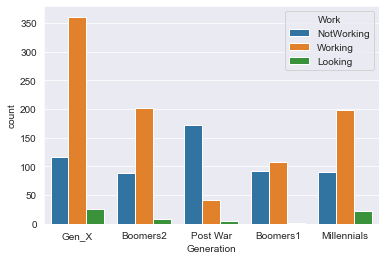

In [60]:
#Does the generation you are in have an influence on work status
sns.countplot(data=na7, x='Generation', hue='Work')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'High School'),
  Text(1, 0, '9 - 11th Grade'),
  Text(2, 0, 'College Grad'),
  Text(3, 0, 'Some College'),
  Text(4, 0, '8th Grade'),
  Text(5, 0, '0')])

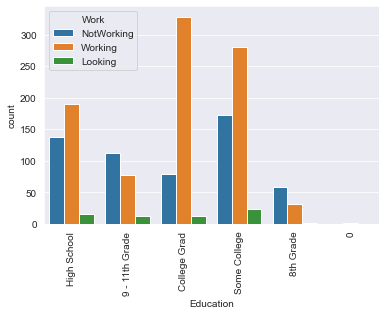

In [61]:
#the likelyhood of working increases with each higher level of education 
sns.countplot(data=na7, x='Education', hue='Work')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='BMI', ylabel='HHIncomeMid'>

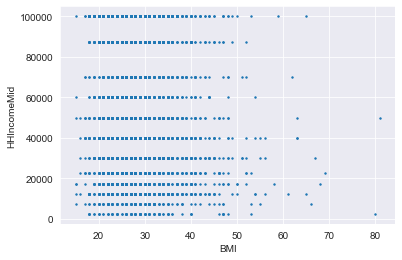

In [62]:
#merge generations with analysis dataframe 
nhanes_analysis2 = nhanes_analysis1.merge(generation, left_on='YearOfBirth', right_on='Born Year')

<AxesSubplot:xlabel='BMI', ylabel='DaysMentHlthBad'>

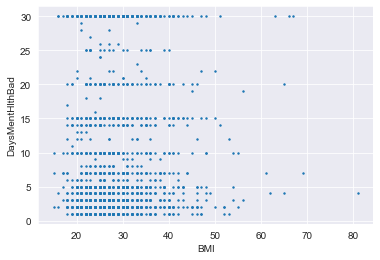

In [63]:
print(nhanes_analysis2)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

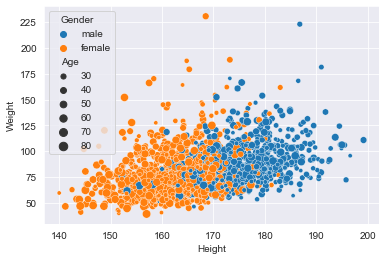

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
nhanes_analysis2['BMI'] = nhanes_analysis2['BMI'].astype(int)

In [55]:
#do not include nulls in the graphs
na3 = nhanes_analysis2[nhanes_analysis2['BMI']>0]
print(na3)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
1     2009_10   34  female    College Grad       Married     Own     Working   
2     2009_10   34  female    College Grad       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
4     2009_10   34    male    College Grad       Married     Own     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4557  2011_12   22  female    Some College  NeverMarried     Own     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   
4559  2011_12   22  female    College Grad  NeverMarried     Own     Working   
4560  2011_12   22    male    Some College  NeverMarried    Rent     Working   
4561  2011_12   22    male  9 - 11th Grade  NeverMarried    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

In [56]:
na4 = na3[na3['HHIncomeMid']>0]
print(na4)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
1     2009_10   34  female    College Grad       Married     Own     Working   
2     2009_10   34  female    College Grad       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
4     2009_10   34    male    College Grad       Married     Own     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4557  2011_12   22  female    Some College  NeverMarried     Own     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   
4559  2011_12   22  female    College Grad  NeverMarried     Own     Working   
4560  2011_12   22    male    Some College  NeverMarried    Rent     Working   
4561  2011_12   22    male  9 - 11th Grade  NeverMarried    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

In [57]:
na5 = na4[na4['DaysMentHlthBad']>0]
print(na5)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
7     2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
11    2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
12    2009_10   34  female     High School  NeverMarried    Rent     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4545  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4550  2011_12   22  female     High School   LivePartner    Rent  NotWorking   
4553  2011_12   22    male     High School   LivePartner    Rent  NotWorking   
4556  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

In [58]:
na6 = na5[na5['Weight']>0]
print(na6)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
7     2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
11    2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
12    2009_10   34  female     High School  NeverMarried    Rent     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4545  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4550  2011_12   22  female     High School   LivePartner    Rent  NotWorking   
4553  2011_12   22    male     High School   LivePartner    Rent  NotWorking   
4556  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

In [59]:
na7 = na6[na6['Height']>0]
print(na7)

     SurveyYr  Age  Gender       Education MaritalStatus HomeOwn        Work  \
0     2009_10   34    male     High School       Married     Own  NotWorking   
3     2009_10   34  female     High School       Married     Own     Working   
7     2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
11    2009_10   34    male  9 - 11th Grade       Married    Rent     Working   
12    2009_10   34  female     High School  NeverMarried    Rent     Working   
...       ...  ...     ...             ...           ...     ...         ...   
4545  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4550  2011_12   22  female     High School   LivePartner    Rent  NotWorking   
4553  2011_12   22    male     High School   LivePartner    Rent  NotWorking   
4556  2011_12   22  female    Some College  NeverMarried    Rent     Working   
4558  2011_12   22  female    College Grad       Married    Rent     Working   

      HHIncomeMid  Weight  Height  BMI 

<AxesSubplot:xlabel='Generation', ylabel='count'>

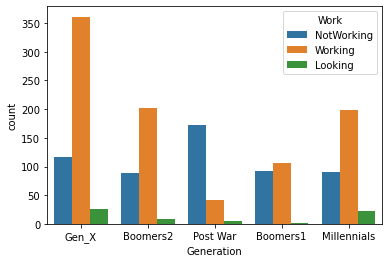

In [60]:
#Does the generation you are in have an influence on work status
sns.countplot(data=na7, x='Generation', hue='Work')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'High School'),
  Text(1, 0, '9 - 11th Grade'),
  Text(2, 0, 'College Grad'),
  Text(3, 0, 'Some College'),
  Text(4, 0, '8th Grade'),
  Text(5, 0, '0')])

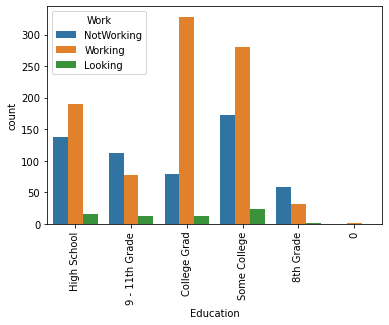

In [61]:
#the likelyhood of working increases with each higher level of education 
sns.countplot(data=na7, x='Education', hue='Work')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='BMI', ylabel='HHIncomeMid'>

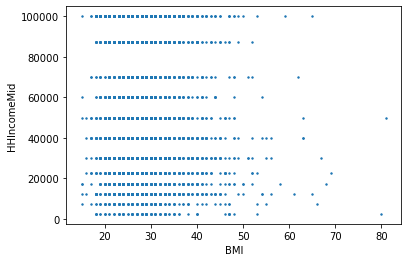

In [62]:
#Salary is estimated in middle of a range causing straight line on the plot. We can deduce BMI has little or no impact on salary
na4.plot.scatter('BMI', 'HHIncomeMid', s=2)

<AxesSubplot:xlabel='BMI', ylabel='DaysMentHlthBad'>

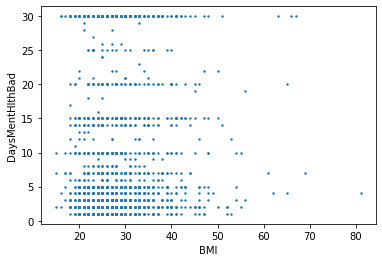

In [63]:
#I have only included days great than 0 to omit null values however this does scew the information as it is possible to have 0 days of bad mental health. BMI does not seem to have a significant affect on mental heatlh
na5.plot.scatter('BMI', 'DaysMentHlthBad', s=2)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

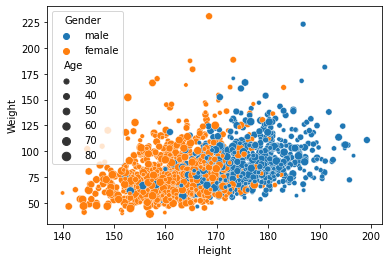

In [64]:
#I looked at weight against height and gender. Males are more likely to be taller than females however the weight differential is less distinct.
sns.scatterplot(x='Height',y='Weight', data=na7, hue='Gender', size='Age')